Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [165]:
NAME = "Shadab Iqbal"
COLLABORATORS = ""

---

This assignment contains 4 tasks. Complete the notebook with proper codes for the lines with `# TO-BE-COMPLETED` tag, or by *uncommenting* a partially written codes where necessary.

Also, as with the previous assignments, remove the `raise NotImplementedError()` line from each code block

# Background

We larned in class that linear spatial filtering is basically a signal correlation opration between an image and a filter kernel. To filter an ```image``` with a ```kernel``` all we need to do is call the ```signal.correlate``` function from the ```scipy``` library.

```python
filtered_image = signal.correlate(image, kernel, mode='same', method='auto')
```
Here, ```mode="same"``` takes care of the image padding under the hood; making the filtered image the *same shape* as the input image, while ```mode="valid"``` *shrinks the filtered image*. The ```method='direct'``` implements the correlation from the definition of signal correlation:

> $g(x, y)=\sum_{s,t}{w(s, t)}f(x+s, y+t)$

whereas ```method='fft'``` uses a frequency domain implementation which we will learn next week. The ```method='auto'``` chooses the faster implementation automatically. <br>
(Except for **Task 1**, always use ```method='auto'``` while using the correlation function )
 

We use the following code stucture to measure the excecution time of some python code:

```python
import time

start_time = time.time()

# some python code

print("Time elapsed: ", time.time() - start_time, "seconds")
```



# **Task 0: The Imports** <br>

Import the necessary libraries and define the helper functions. You can use the helper functions from the coding tutorials, or you can even use your own version of helper functions. <br>


In [166]:
# Import libraries 

from skimage.io import imread, imshow
from skimage import img_as_float  # automatically normalizes pixel values
from skimage.color import rgb2gray
from skimage.util import pad, random_noise

import numpy as np

from scipy import signal

import random

import matplotlib.pyplot as plt
   
# YOUR CODE HERE

In [167]:
# Define helper functions

def plot_image(img,figsize=(5,5)):
    plt.figure(figsize=figsize)
    if len(img.shape)==2:
        plt.imshow(img, cmap="gray")
    else:
        plt.imshow(img)
    plt.axis("off")
    plt.show()
    print("Image shape: ", img.shape)

def plot_kernel(kernel, cmap="Reds"):
    plt.imshow(kernel, interpolation='none', cmap="Reds")
    plt.colorbar()
    plt.show()
    print("Kernel shape: ", kernel.shape)

def gaussian_kernel(width=1, size=10, sym=True):
    gaussian1dkernel = signal.gaussian(size, width, sym=sym).reshape(size, 1)
    kernel = np.outer(gaussian1dkernel, gaussian1dkernel)
    return kernel/np.sum(kernel)

def box_kernel(size=5):
    return np.ones((size, size))/size**2
        
# YOUR CODE HERE

# **Task 1: Execution Time** <br>
Excecution time comparison for the 2 different methods of the correlation function


import your image or any photo taken by you (`sample.jpeg`) as a numpy array, save it in the varaible `I`

remember your image name MUST be `sample.jpeg`. Replace the existing `sample.jpeg` image

Make sure the height and the width of the image is **smaller than 512 pixels**.

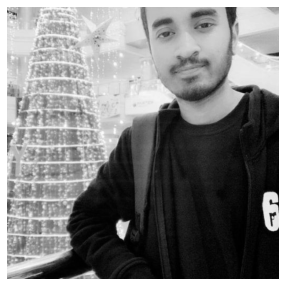

Image shape:  (512, 512)


In [168]:
# Import an image taken by you, make sure it's dimensions does not exceed (512, 512). Downsample if necessary.

i = img_as_float(imread("sample.jpeg"))# TO-BE-COMPLETED
i_g = rgb2gray(i)

# YOUR CODE HERE
plot_image(i_g)

In [169]:
# Define a gaussian kernel of size (35, 35)

k = 35
# spread = 2
kernel = gaussian_kernel(size = k) # TO-BE-COMPLETED
    
# YOUR CODE HERE

Time elapsed using direct method of correlation:  5.649943113327026 seconds


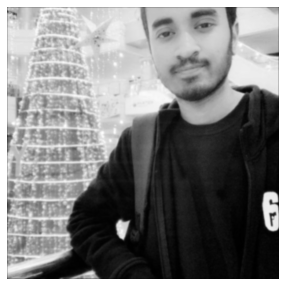

Image shape:  (512, 512)


In [170]:
# Determine the time to filter the image with the kernel using "direct" method

import time
 
start_time = time.time()


filetred_image_direct = signal.correlate(i_g, kernel, mode='same', method='direct') # TO-BE-COMPLETED
    
# YOUR CODE HERE
 
print("Time elapsed using direct method of correlation: ", time.time() - start_time, "seconds")

plot_image(filetred_image_direct)

Time elapsed using fft method of correlation:  0.01668858528137207 seconds


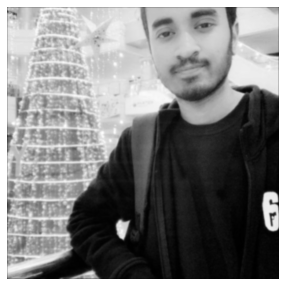

Image shape:  (512, 512)


In [171]:
# Determine the time to filter the image with the kernel using "fft" method
 
start_time = time.time()
 
filetred_image_fft = signal.correlate(i_g, kernel, mode='same', method='fft')  # TO-BE-COMPLETED
    
# YOUR CODE HERE
 
print("Time elapsed using fft method of correlation: ", time.time() - start_time, "seconds")

plot_image(filetred_image_fft)

## Question 1
Compare the execution times. Which one is faster? Why?

"fft" method is faster. In case of discrete signal, the FFT method requires O(N log N) time, but the direct summation method requires O(N  x N) time. 
Again, it also depends on the kernel size. **Moreover, I made an observation that, If the kernel is much smaller in size than the original image, then the time required for "fft" method and "direct" method is almost the same.**

(From here onwards, please use ```method="auto"``` while using any signal function.)

# **Task 2: Correlation Vs. Convolution** <br>
Comparing the correlation and convolution operation for different kernels


In [172]:
# Define a symmetric kernel of size (35, 35)

k = 35
kernel_symmetric = gaussian_kernel(size = k) # TO-BE-COMPLETED
    
# YOUR CODE HERE
# print(kernel_symmetric)

In [173]:
# Define an asymmetric kernel of size (35, 35)

kernel_asymmetric = gaussian_kernel(size = k, sym=False) # TO-BE-COMPLETED
    
# YOUR CODE HERE
# print(kernel_asymmetric)

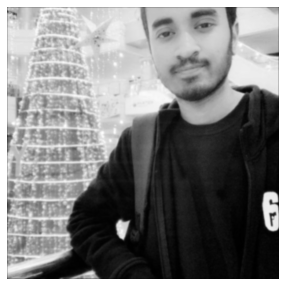

Image shape:  (512, 512)


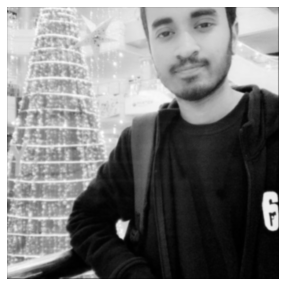

Image shape:  (512, 512)


In [174]:
# Filter the `image` with the symmetric kernel using the CORRELATION function

correlation_image_symmetric = signal.correlate(i_g, kernel_symmetric, mode='same', method='auto') 
correlation_image_asymmetric = signal.correlate(i_g, kernel_asymmetric, mode='same', method='auto')
    
# YOUR CODE HERE
plot_image(correlation_image_symmetric)
plot_image(correlation_image_asymmetric)

Now, to *convolve* an ```image``` with a ```kernel``` all we need to do is call the ```signal.convolve``` function from the ```scipy``` library.

```python
filtered_image = signal.convolve(image, kernel, mode='same', method='auto')
```

The parameters work the same way as the ```signal.correlate```function.

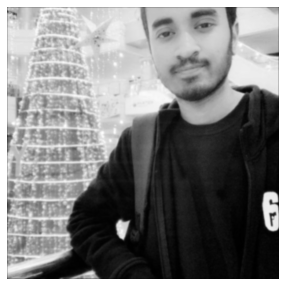

Image shape:  (512, 512)


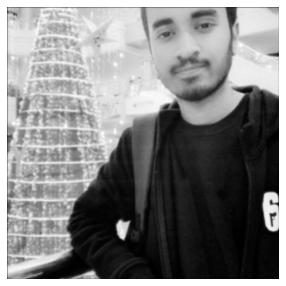

Image shape:  (512, 512)


In [175]:
# Filter the image with the asymmetric kernel using the CONVOLUTION function

filtered_image_symmetric = signal.convolve(i_g, kernel_symmetric, mode='same', method='auto')
filtered_image_asymmetric = signal.convolve(i_g, kernel_asymmetric, mode='same', method='auto')

    
# YOUR CODE HERE
plot_image(filtered_image_symmetric)
plot_image(filtered_image_asymmetric)

## Question 2
Compare the the outputs (`filtered_image_symmetric` vs `correlation_image_symmetric`, and `filtered_image_asymmetric` vs `correlation_image_asymmetric`). Are the outputs same or different? Why or why not

Yes the outputs are same. Because, when the kernel is symmetric both the correlation and convolution produces exactly same output. And when the kernel is asymmetric, the kernel is rotated by 180 degrees. 

# Task 3: Edge Pair Detector 
Try to come up with two 3 x 3 filter kernels which are able to detect ***only the parallel pair of edges*** in the following image
<img src="diamond.jpeg" alt="diamond" width="200"/>

**Hint**: *No mathematical derivation is necessary. Just try devising the kernels using the same intuitions used behind the horizontal and vertical edge detector kernels. Coming up with a filter kernel means to determine the 9 filter coefficients of the 3x3 filer kernel.*

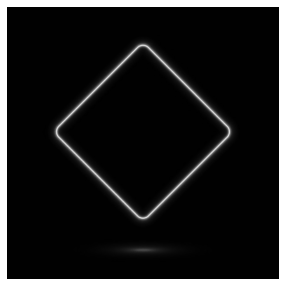

Image shape:  (626, 626)


In [176]:
# Load the image "diamond.jpeg"

image = rgb2gray(imread("diamond.jpeg")) # TO-BE-COMPLETED
    
# YOUR CODE HERE
plot_image(image)

In [177]:
# define the 2 custom kernels

kernel_1 = None
kernel_1 = np.array([[0, 0, -1], # TO-BE-COMPLETED
                     [0, 0, 0], # TO-BE-COMPLETED
                     [1, 0, 0]]) # TO-BE-COMPLETED

kernel_2 = None
kernel_2 = np.array([[-1, 0, 0], # TO-BE-COMPLETED
                     [0, 0, 0], # TO-BE-COMPLETED
                     [0, 0, 1]]) # TO-BE-COMPLETED

    
# YOUR CODE HERE

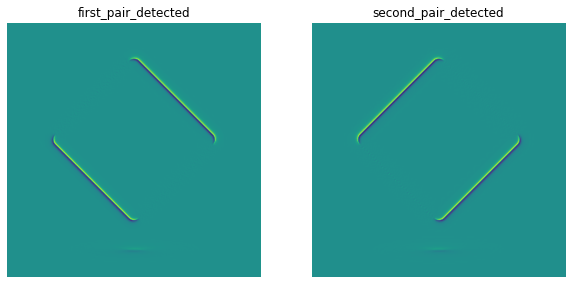

In [178]:
# detect the first pair using image filtering with kernel_1

first_pair_detected = signal.correlate(image, kernel_1, mode='same', method='auto')  # TO-BE-COMPLETED

# detect the second pair using image filtering with kernel_2

second_pair_detected = signal.correlate(image, kernel_2, mode='same', method='auto') # TO-BE-COMPLETED

    
# YOUR CODE HERE

# plot the two filtered images side by side

'''Uncomment the following code block when done'''


fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1,2,1)
ax1.imshow(first_pair_detected) 
ax1.title.set_text('first_pair_detected')
ax1.axis("off")

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(second_pair_detected)
ax2.title.set_text('second_pair_detected')
ax2.axis("off")
plt.show()

# pass

## Question 3

Briefly explain how did you came up with the kernels

First of all from the link given in the lecture video on the derivation of sobel operator, I tried to figure out the intuition behind this concept. I tried to understand how the derivatives are working in respect to the distance between the center pixel and other pixels. Then the thought came to my mind that I can easily find a diagonal line if I only take the derivatives of the diagonal points from the centre. That is how, I could detect only the diagonal edges  in the picture. 

# Task 4: Image Denoising 

Take `something.jpg` image and corrupt it with **gaussian noise** of *0 mean* and *0.01 variance*. Denoise the image using:

1.   Total Variation Denoising (TVD), and
2.   Bilateral Filtering (BF).

Feel free to experiment with the different filter parameters and try to come up with a cleaner image. Fianlly, comapre the MSE between the denoised images and the original uncorrupted image.




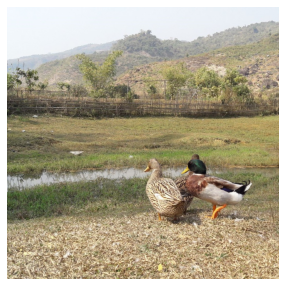

Image shape:  (1012, 1012, 3)


In [179]:
# Load the image "something.jpeg"

image = img_as_float(imread("something.jpeg"))
    
# YOUR CODE HERE
plot_image(image)

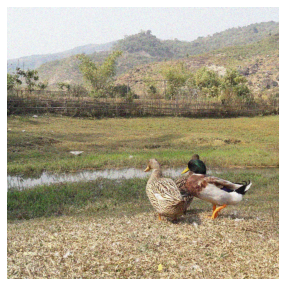

Image shape:  (1012, 1012, 3)


In [180]:
# corrupt the original image with **gaussian noise** of *0 mean* and *0.01 variance*

image_noisy = random_noise(image, mode="gaussian", mean = 0, var=0.01)
    
# YOUR CODE HERE
plot_image(image_noisy)

import the bilateral filter. **Hint**:

```python
from skimage.restoration import ... # TO-BE-COMPLETED
```

import the total variation denoising filter. **Hint**:
```python
from skimage.restoration import ... # TO-BE-COMPLETED
```

In [181]:
# Import the above mentioned libraries
from skimage.restoration import denoise_bilateral
from skimage.restoration import denoise_tv_chambolle
    
# YOUR CODE HERE

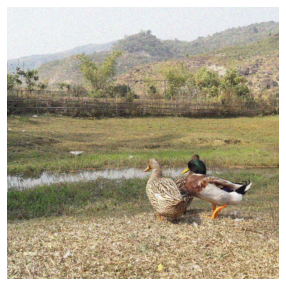

Image shape:  (1012, 1012, 3)


In [182]:
# clean the image using TVD

image_denoised_tvd = denoise_tv_chambolle(image_noisy,
                                       weight=0.1, eps=0.1, n_iter_max=500, multichannel=True) # TO-BE-COMPLETED
    
# YOUR CODE HERE
plot_image(image_denoised_tvd)

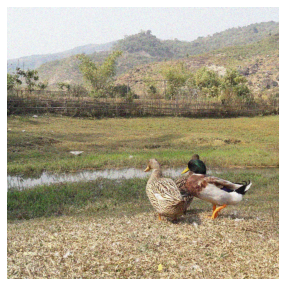

Image shape:  (1012, 1012, 3)


In [183]:
# clean the image using BF

image_denoised_bf = denoise_bilateral(image_noisy, win_size=0, 
                                           sigma_color=None, sigma_spatial=1, multichannel=True) # TO-BE-COMPLETED
    
# YOUR CODE HERE
plot_image(image_denoised_bf)

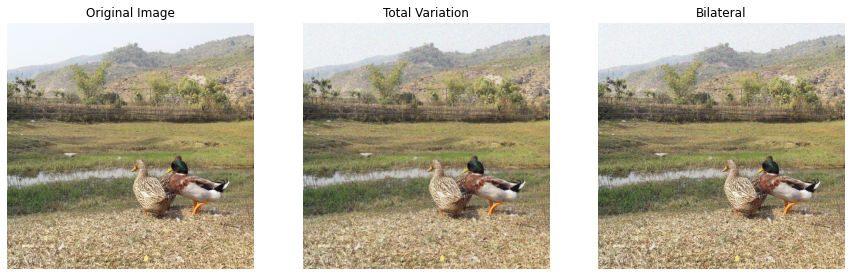

In [184]:
# plot image, image_denoised_tvd & image_denoised_bf side by side in a 1x3 grid subplot

fig = plt.figure(figsize=(15, 15))

ax1 = fig.add_subplot(1,3,1)
ax1.imshow(image) 
ax1.title.set_text('Original Image')
ax1.axis("off")

ax2 = fig.add_subplot(1,3,2)
ax2.imshow(image_denoised_tvd)
ax2.title.set_text('Total Variation')
ax2.axis("off")

ax3 = fig.add_subplot(1,3,3)
ax3.imshow(image_denoised_bf)
ax3.title.set_text('Bilateral')
ax3.axis("off")

# YOUR CODE HERE
plt.show()

In [185]:
# compute the MSE

mse_tvd = np.sum((image - image_denoised_tvd)**2)/np.prod(image.shape)
mse_bf = np.sum((image - image_denoised_bf)**2)/np.prod(image.shape)

# YOUR CODE HERE
print("MSE for Total Variation => ", mse_tvd)
print("MSE for Bilateral Filtering => ", mse_bf)

MSE for Total Variation =>  0.003793540823500369
MSE for Bilateral Filtering =>  0.009297050103540112


## Question 4
Briefly explain your findings both qualitatively (which one looks better) and quantitatively (which one has a better MSE).

From my perspective, Total Variation Denoised image looked better and when I calculated the MSE, I found out that my guess was right, as the MSE for Total Variataion Denoise Image is less than the Bilateral filtering Denoise Image which indicates that TVD is working better than BF, at least in this image's case. 

**If we INCREASE the "eps" value in "denoise_tv_chambolle" function, we get a better image     ............    and If we DECREASE the "win_size" value in "denoise_bilateral" function, we get a better image**